In [6]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as grid
import matplotlib.image as matimage
import cv2
%matplotlib inline

In [7]:
def  brightness(imageNamefilePath):
  imageData=cv2.cvtColor(imageNamefilePath,cv2.COLOR_RGB2HSV)
  Randombrightness=0.5*np.random.uniform()
  imageData[:, : , 2]=  imageData[:, : , 2]*Randombrightness
  imageData=cv2.cvtColor(imageData,cv2.COLOR_HSV2RGB)
  return imageData








In [8]:
def imageTransformation(imageNamefilePath,angel_range_change,shear_range_change,translation_range):

  
  angle_rotation=np.random.uniform(angel_range_change)-angel_range_change/2
  image_height,image_width,color_ch=imageNamefilePath.shape
  image_metrixCalculation=cv2.getRotationMatrix2D((image_width/2,image_height/2),angle_rotation,1)



   

  
  #image_translation
  axisX=translation_range*np.random.uniform()-translation_range/2
  axisY=translation_range*np.random.uniform()-translation_range/2
  translationconcatenate=np.float32([[1,0,axisX],[0,1,axisY]])



     
    

  
   #image shear_range_Calculation
  shear_range_changeValue=np.float32([ [5    ,5]   ,[20   ,5],     [5,     20] ])
  axisPoint1=5+shear_range_change*np.random.uniform()-shear_range_change/2
  axisPoint2=20+shear_range_change*np.random.uniform()-shear_range_change/2
  Points=np.float32([[axisPoint1,5],[axisPoint2,axisPoint1],[5,axisPoint2]])
  ShearRange=cv2.getAffineTransform(shear_range_changeValue,Points)


  
  image=cv2.warpAffine(imageNamefilePath,image_metrixCalculation,(image_width,image_height))
  image=cv2.warpAffine(image,translationconcatenate,(image_width,image_height))
  image=cv2.warpAffine(image,  ShearRange,(image_width,image_height))
  image=brightness(image)
  return image







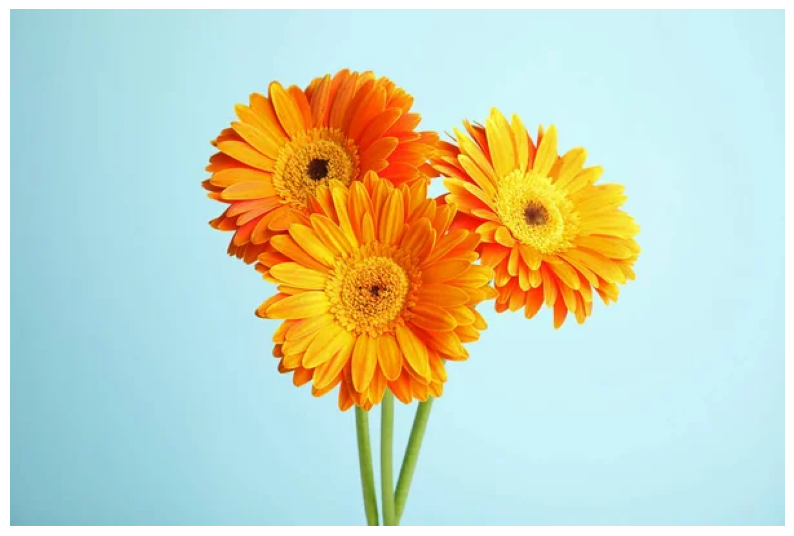

In [9]:

plt.figure(figsize=(10,10))

image_path=matimage.imread("/kaggle/input/custom-image-dataset/flower.jpg")

plt.imshow(image_path)
plt.axis("off")
plt.show()

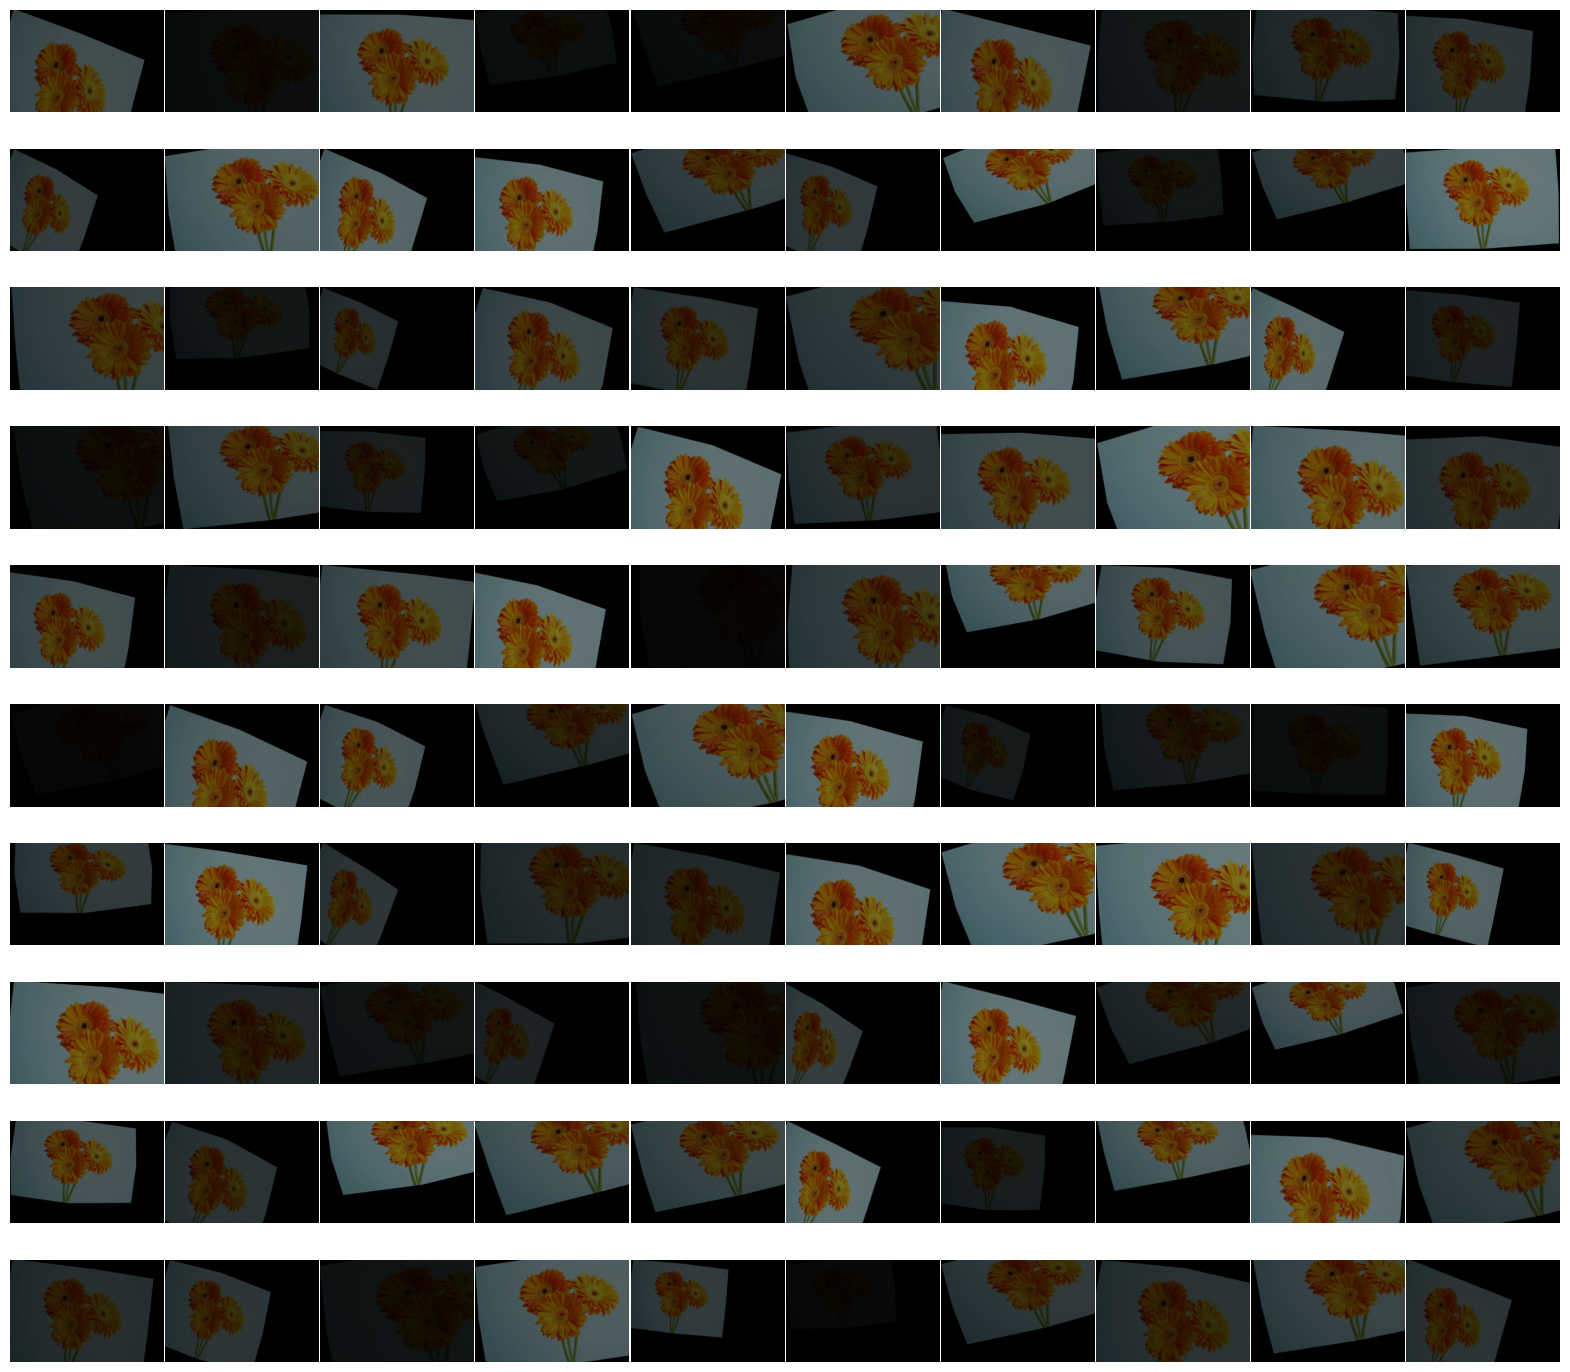

In [10]:
gridValue1=grid.GridSpec(10,10)
gridValue1.update(wspace=0.01,hspace=0.02)
plt.figure(figsize=(20,18))
for i in range(100):
   ax1=plt.subplot(gridValue1[i])
   ax1.set_xticklabels([])
   ax1.set_yticklabels([])
   ax1.set_aspect("equal")
   image=imageTransformation(image_path,20,10,5)
   plt.subplot(10,10,i+1)
   plt.imshow(image)
   plt.axis("off")
   plt.savefig("/kaggle/working/new_image.jpg")
   
plt.show()


  